In [ ]:
!pip install stable-baselines gym-anytrading gym

     |████████████████████████████████| 240 kB 4.4 MB/s 
     |████████████████████████████████| 171 kB 54.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0

     |████████████████████████████████| 411.5 MB 7.9 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 59.8 MB/s 
     |████████████████████████████████| 3.8 MB 45.0 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9888c07b7241bb25671eea271038a4c667d4eda6e0bba82bf6e7ebf1313a45d8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing install

In [6]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [7]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/a2cdata.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())
print(df.shape)

        Date  Open  High  Low  Close  Volume
0 2022-04-01   203   238  179    220  118075
1 2022-05-01   219   242  196    212  117591
2 2022-06-01   242   242  186    216  118054
3 2022-07-01   187   237  185    206  118730
4 2022-10-01   202   233  184    211  118508
(81, 6)


In [11]:
env=gym.make('stocks-v0',df=df,frame_bound=(5,70),window_size=5)

In [12]:
env.signal_features

array([[220,   0],
       [212,  -8],
       [216,   4],
       [206, -10],
       [211,   5],
       [195, -16],
       [194,  -1],
       [188,  -6],
       [227,  39],
       [205, -22],
       [183, -22],
       [197,  14],
       [218,  21],
       [237,  19],
       [237,   0],
       [158, -79],
       [184,  26],
       [213,  29],
       [202, -11],
       [203,   1],
       [184, -19],
       [174, -10],
       [200,  26],
       [190, -10],
       [215,  25],
       [281,  66],
       [278,  -3],
       [223, -55],
       [249,  26],
       [231, -18],
       [258,  27],
       [266,   8],
       [221, -45],
       [216,  -5],
       [231,  15],
       [187, -44],
       [195,   8],
       [245,  50],
       [227, -18],
       [158, -69],
       [182,  24],
       [200,  18],
       [206,   6],
       [181, -25],
       [158, -23],
       [183,  25],
       [202,  19],
       [209,   7],
       [203,  -6],
       [216,  13],
       [204, -12],
       [201,  -3],
       [194,

## Building random environment

info {'total_reward': -104.0, 'total_profit': 0.5036246541626561, 'position': 0}


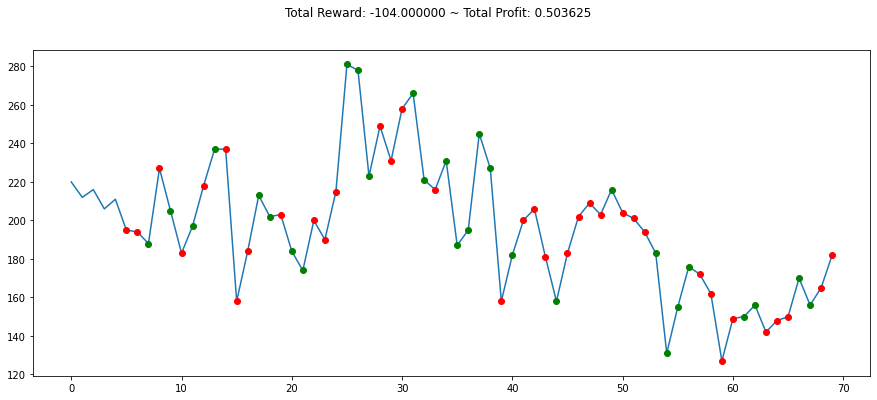

In [13]:
state=env.reset()
while True:
  action=env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Training

In [18]:
env_maker= lambda: gym.make('stocks-v0',df=df,frame_bound=(5,70),window_size=5)
env=DummyVecEnv([env_maker])

In [19]:
model=A2C('MlpLstmPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

----------------------------------
| explained_variance | -0.000889 |
| fps                | 21        |
| nupdates           | 1         |
| policy_entropy     | 0.69      |
| total_timesteps    | 5         |
| value_loss         | 377       |
----------------------------------
----------------------------------
| explained_variance | -0.000551 |
| fps                | 338       |
| nupdates           | 100       |
| policy_entropy     | 0.69      |
| total_timesteps    | 500       |
| value_loss         | 1.25e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00122  |
| fps                | 356      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 388      |
---------------------------------
---------------------------------
| explained_variance | 0.0276   |
| fps                | 371      |
| nupdates           | 300      |
| policy_entropy     | 0.692    

In [20]:
env = gym.make('stocks-v0', df=df, frame_bound=(60, 81), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.0, 'total_profit': 0.9810614889461771, 'position': 0}


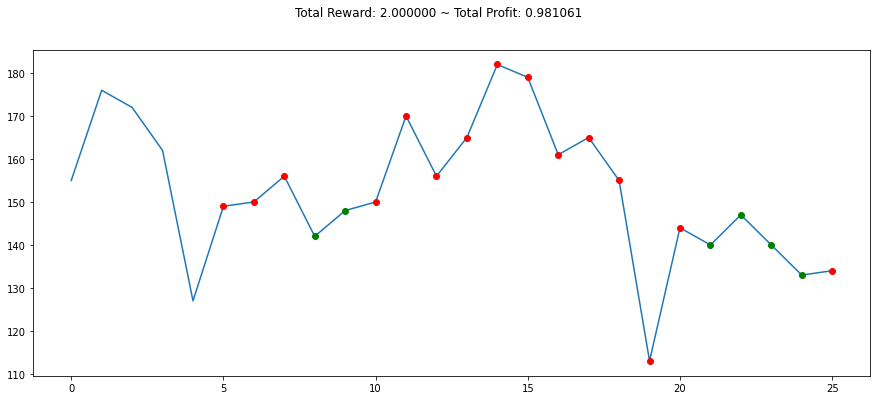

In [21]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()